<a href="https://colab.research.google.com/github/Chimata-Bhavya/DataAnalytics/blob/HDFC_Internship/LoanPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
data = pd.read_csv('bankloan.csv')
data.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [50]:
data['LoanTaken'] = data['Personal.Loan'].copy()

In [51]:
data=data.drop(['ID','ZIP.Code','Personal.Loan'],axis=1)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Securities.Account  5000 non-null   int64  
 8   CD.Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
 11  LoanTaken           5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [53]:
data['Income'] = data['Income']*1000

In [54]:
data['CCAvg'] = data['CCAvg']*1000

In [55]:
data['Experience'] = data['Experience'].clip(lower=0)

In [56]:
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account,Online,CreditCard,LoanTaken
0,25,1,49000,4,1600.0,1,0,1,0,0,0,0
1,45,19,34000,3,1500.0,1,0,1,0,0,0,0
2,39,15,11000,1,1000.0,1,0,0,0,0,0,0
3,35,9,100000,1,2700.0,2,0,0,0,0,0,0
4,35,8,45000,4,1000.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40000,1,1900.0,3,0,0,0,1,0,0
4996,30,4,15000,4,400.0,1,85,0,0,1,0,0
4997,63,39,24000,2,300.0,3,0,0,0,0,0,0
4998,65,40,49000,3,500.0,2,0,0,0,1,0,0


In [57]:
data['LoanTaken'].value_counts()

LoanTaken
0    4520
1     480
Name: count, dtype: int64

In [58]:
data['Education'] = data['Education'].replace({1:'Bachelors',2:'Masters',3:'Advanced'})

In [59]:
data['Securities.Account'] = data['Securities.Account'].replace({0:'No',1:'Yes'})
data['CD.Account'] = data['CD.Account'].replace({0:'No',1:'Yes'})
data['Online'] = data['Online'].replace({0:'No',1:'Yes'})
data['CreditCard'] = data['CreditCard'].replace({0:'No',1:'Yes'})

In [60]:
cont_data = data.select_dtypes(include=['number'])
cont_data = cont_data.drop('LoanTaken',axis=1)
cont_data

,Age,Experience,Income,Family,CCAvg,Mortgage
0,25,1,49000,4,1600.0,0
1,45,19,34000,3,1500.0,0
2,39,15,11000,1,1000.0,0
3,35,9,100000,1,2700.0,0
4,35,8,45000,4,1000.0,0
...,...,...,...,...,...,...
4995,29,3,40000,1,1900.0,0
4996,30,4,15000,4,400.0,85
4997,63,39,24000,2,300.0,0
4998,65,40,49000,3,500.0,0


In [61]:
cont_corr = cont_data.corr()

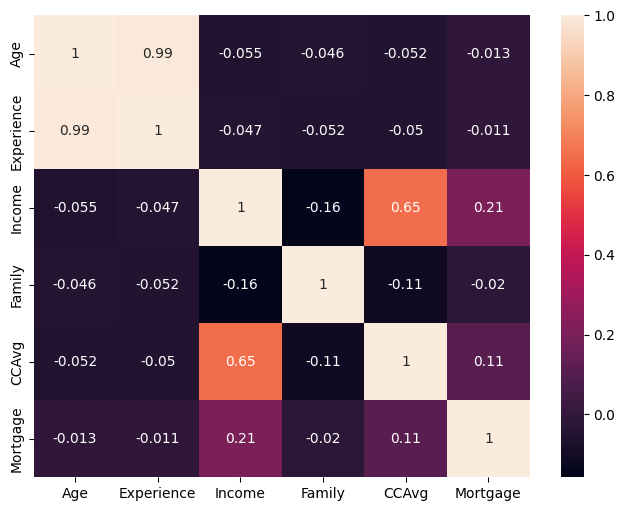

In [62]:
plt.figure(figsize=(8,6))
sns.heatmap(cont_corr,annot=True)
plt.show()

In [63]:
cont_data = cont_data.drop(['Family','Mortgage'],axis=1)

In [64]:
data['LoanTaken'] = data['LoanTaken'].replace({0:'No',1:'Yes'})

In [65]:
cont_table = pd.crosstab(data['LoanTaken'],data['CreditCard'])

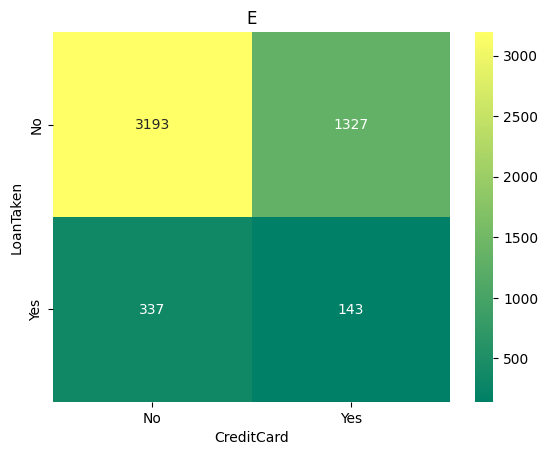

In [66]:
sns.heatmap(cont_table,annot=True,fmt='d',cmap='summer')
plt.title("E")
plt.show()

In [67]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account,Online,CreditCard,LoanTaken
0,25,1,49000,4,1600.0,Bachelors,0,Yes,No,No,No,No
1,45,19,34000,3,1500.0,Bachelors,0,Yes,No,No,No,No
2,39,15,11000,1,1000.0,Bachelors,0,No,No,No,No,No
3,35,9,100000,1,2700.0,Masters,0,No,No,No,No,No
4,35,8,45000,4,1000.0,Masters,0,No,No,No,Yes,No


In [68]:
data['LoanTaken'] = data['LoanTaken'].replace({'No':0,'Yes':1})

### Box plots of continuous variables with Education

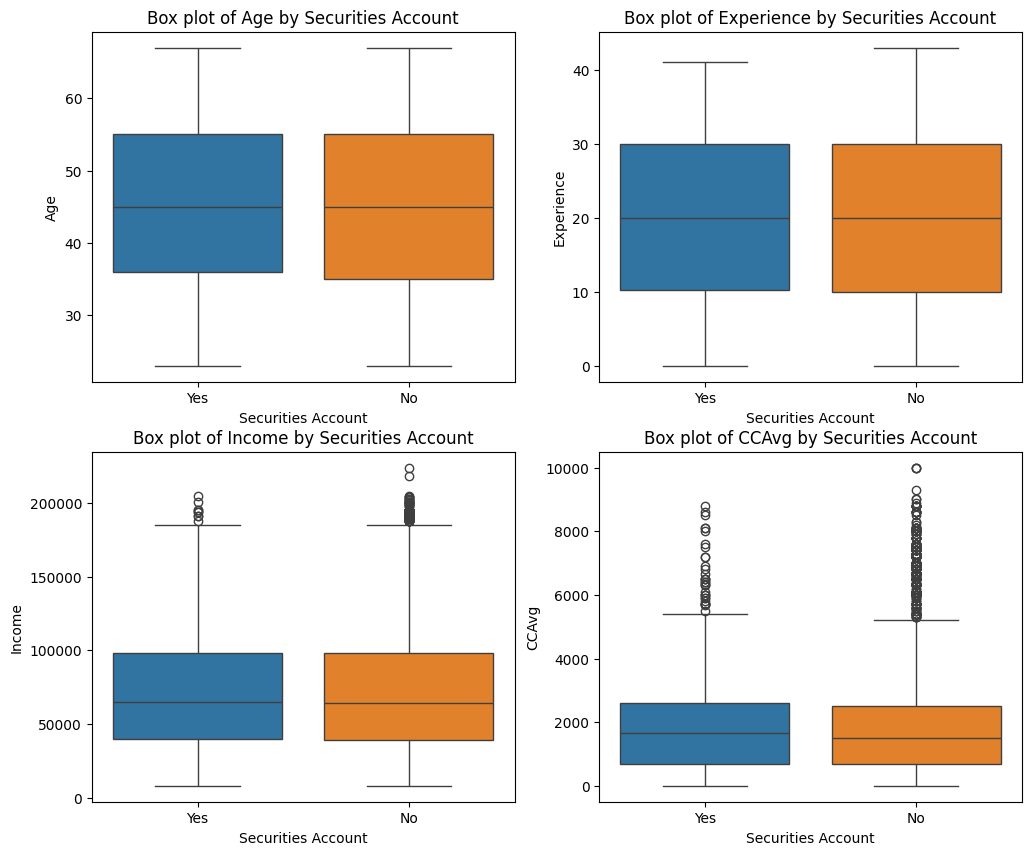

In [71]:
plt.figure(figsize=(12, 10))

for i, var in enumerate(cont_data.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Securities.Account', y=var, data=data, hue = 'Securities.Account')
    plt.title(f'Box plot of {var} by Securities Account')
    plt.xlabel('Securities Account')
    plt.ylabel(var)


plt.show()

### Bar plot of continuous variables with Securities Account

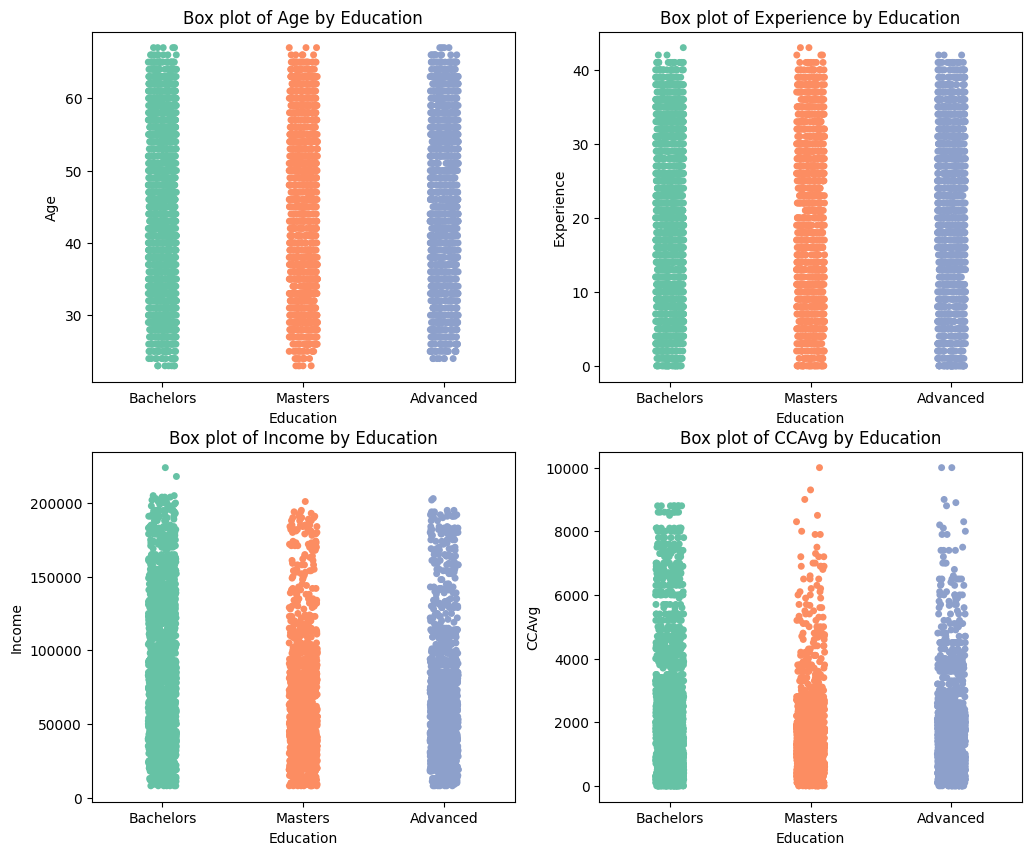

In [72]:
plt.figure(figsize=(12, 10))

for i, var in enumerate(cont_data.columns, 1):
    plt.subplot(2, 2, i)
    sns.stripplot(x='Education', y=var, data=data, hue='Education',palette='Set2')
    plt.title(f'Box plot of {var} by Education')
    plt.xlabel('Education')
    plt.ylabel(var)
plt.show()

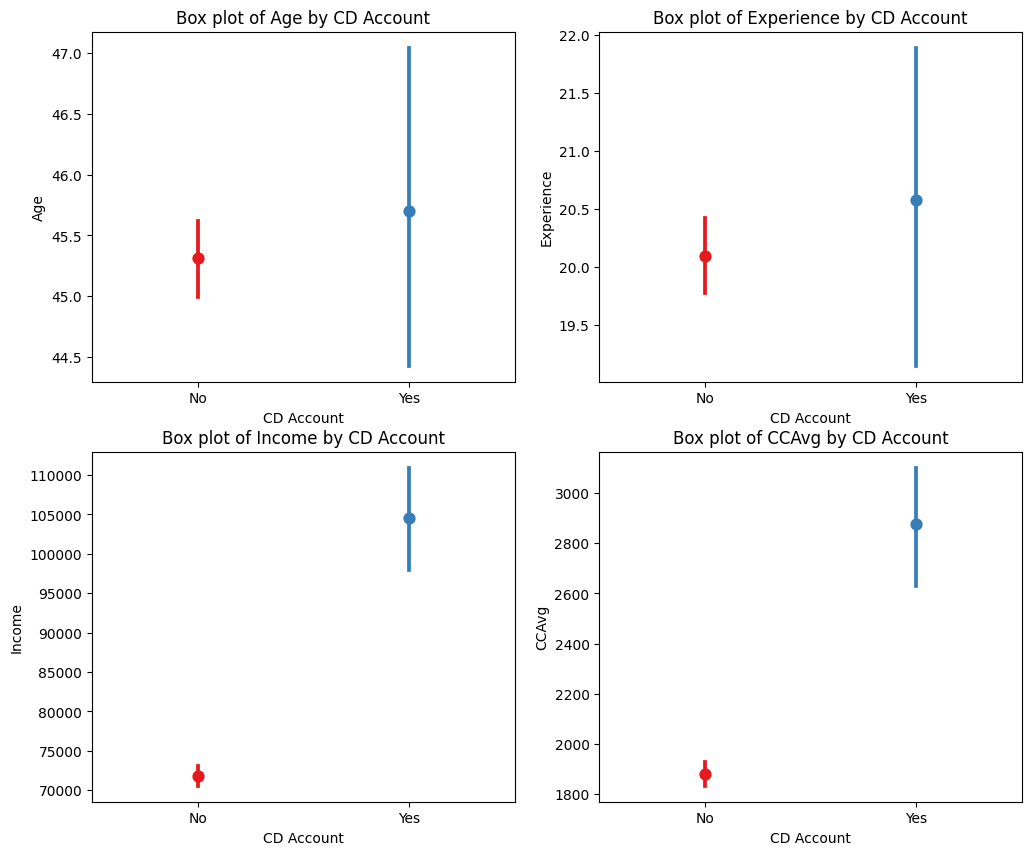

In [73]:
plt.figure(figsize=(12, 10))
for i, var in enumerate(cont_data.columns, 1):
    plt.subplot(2, 2, i)
    sns.pointplot(x='CD.Account', y=var, data=data,hue='CD.Account',palette='Set1')
    plt.title(f'Box plot of {var} by CD Account')
    plt.xlabel('CD Account')
    plt.ylabel(var)


plt.show()

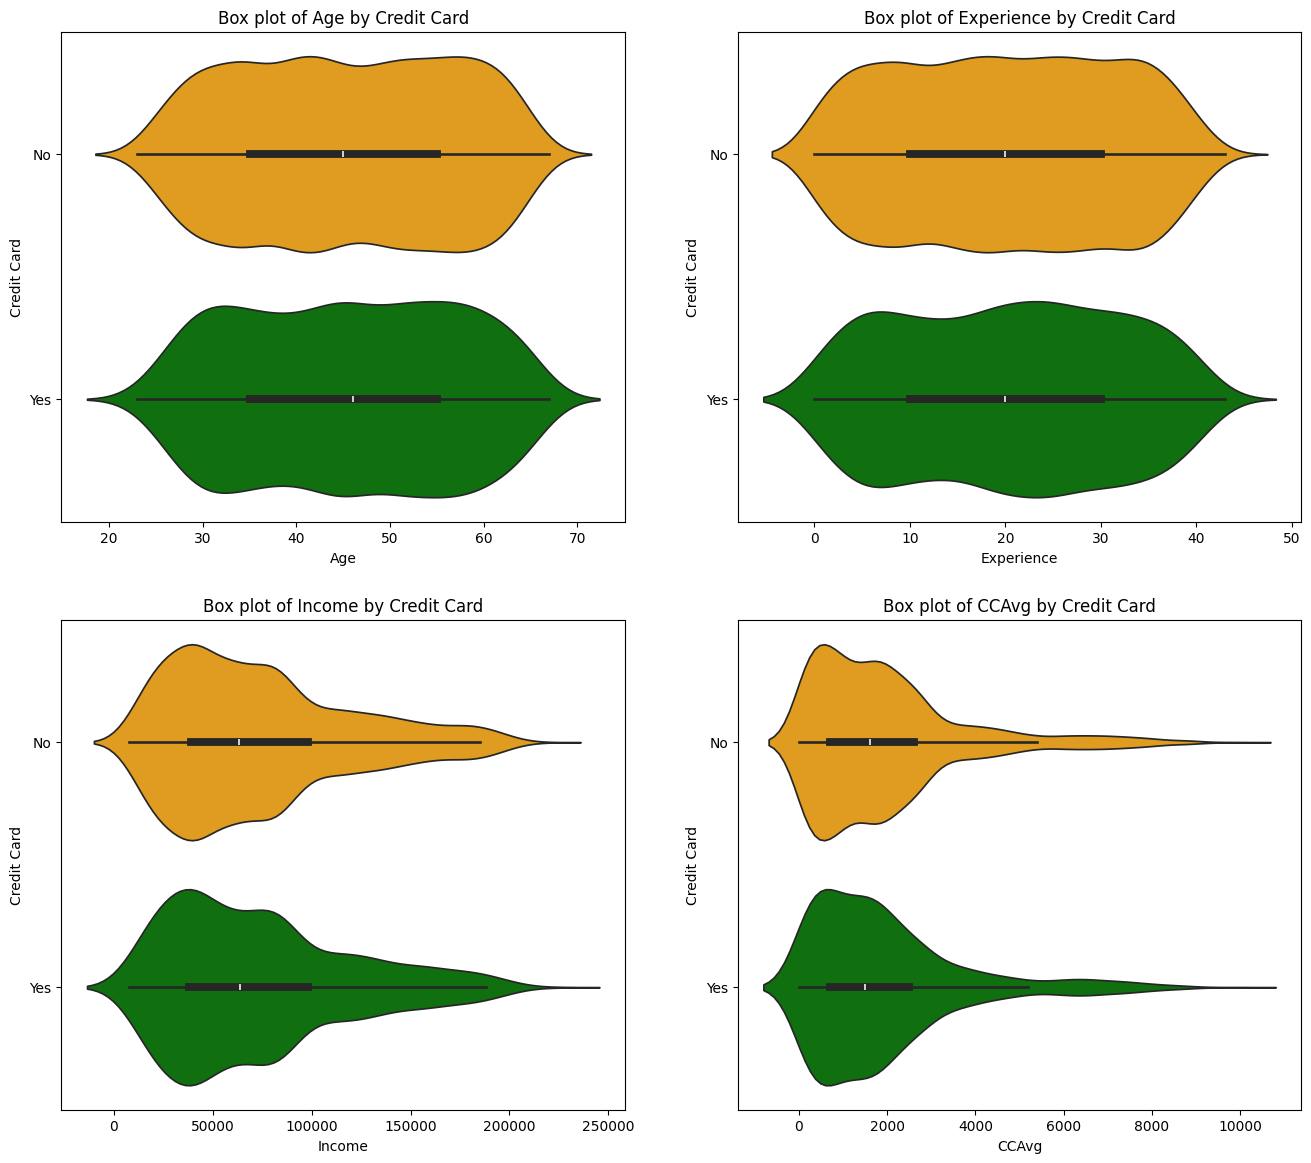

In [74]:
custom_palette = {'Yes':'green','No':'orange'}
plt.figure(figsize=(16, 14))

for i, var in enumerate(cont_data.columns, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x=var, y='CreditCard', data=data,hue='CreditCard',palette=custom_palette)
    plt.title(f'Box plot of {var} by Credit Card')
    plt.xlabel(var)
    plt.ylabel('Credit Card')


plt.show()

### Heatmap of Education and other categorical variables

In [75]:
from scipy.stats import chi2_contingency

In [76]:
cat_columns = data.select_dtypes(include=['object'])

Chi-Square Test for Education and Securities.Account
Chi2: 0.7714682435445043, p-value: 0.6799512858920018



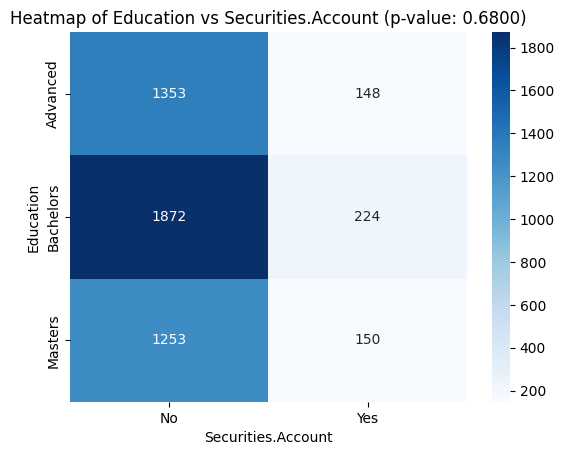

Chi-Square Test for Education and CD.Account
Chi2: 1.0896096963526012, p-value: 0.5799549515634557



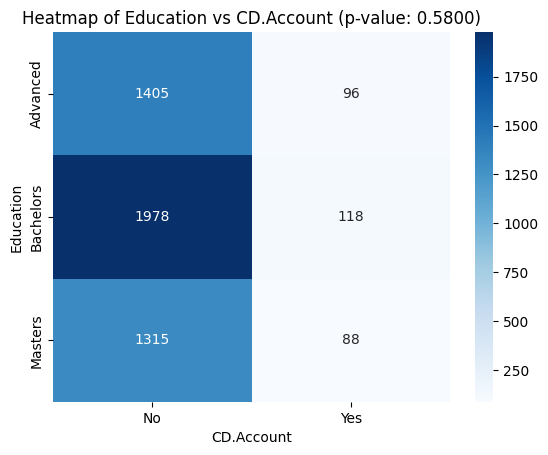

Chi-Square Test for Education and Online
Chi2: 3.546454240904864, p-value: 0.1697841897500873



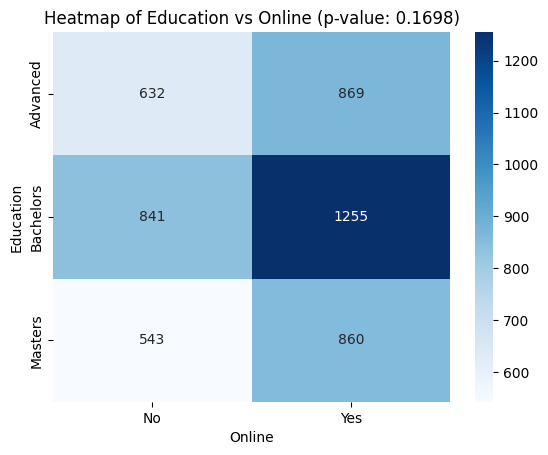

Chi-Square Test for Education and CreditCard
Chi2: 1.2410828349087824, p-value: 0.5376532639170365



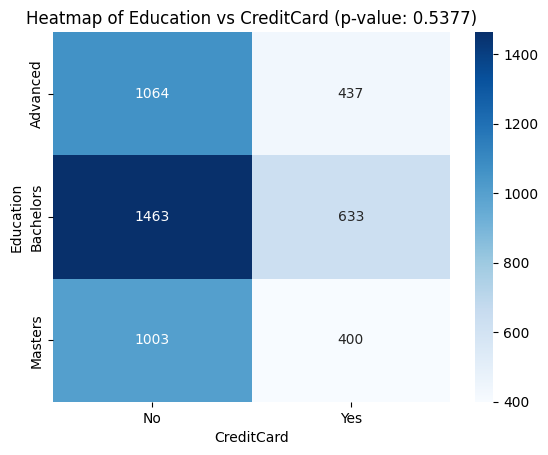

In [77]:
for cat_col in cat_columns:
    if cat_col == 'Education':
        continue
    else:
        contingency_table = pd.crosstab(data['Education'], data[cat_col])

        # Perform Chi-Square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f'Chi-Square Test for Education and {cat_col}')
        print(f'Chi2: {chi2}, p-value: {p}\n')

        # Plot heatmap
        sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Heatmap of Education vs {cat_col} (p-value: {p:.4f})')
        plt.xlabel(cat_col)
        plt.ylabel('Education')
        plt.show()

### Grouped bar plot of Securities Account with other variables

Chi-Square Test for Securities Account and Education
Chi2: 0.7714682435445044, p-value: 0.6799512858920017



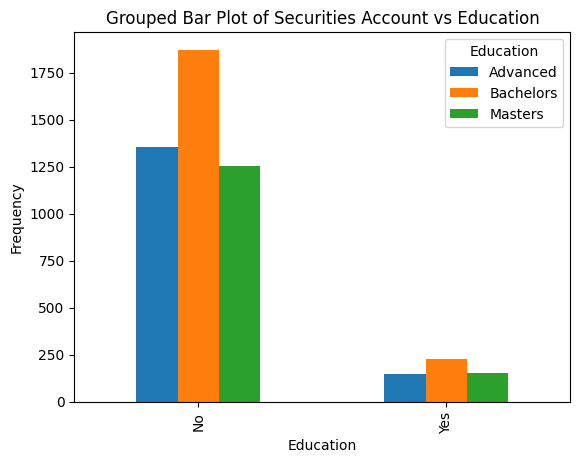

Chi-Square Test for Securities Account and CD.Account
Chi2: 498.2113233272827, p-value: 2.3289041632628143e-110



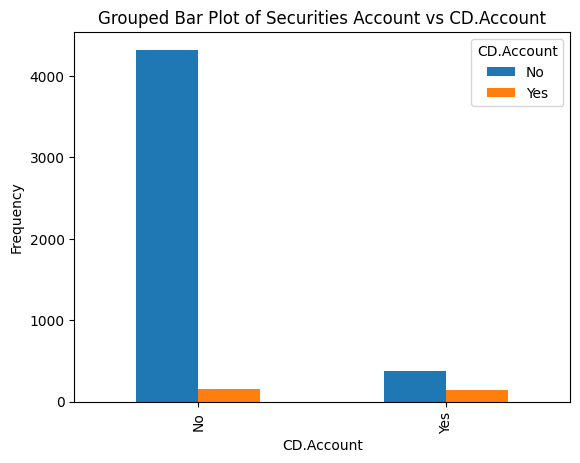

Chi-Square Test for Securities Account and Online
Chi2: 0.7153024169236211, p-value: 0.39768913798982486



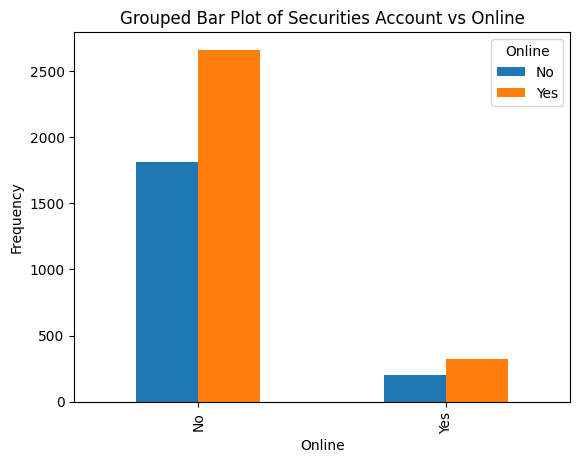

Chi-Square Test for Securities Account and CreditCard
Chi2: 1.0239516242903668, p-value: 0.31158350312525235



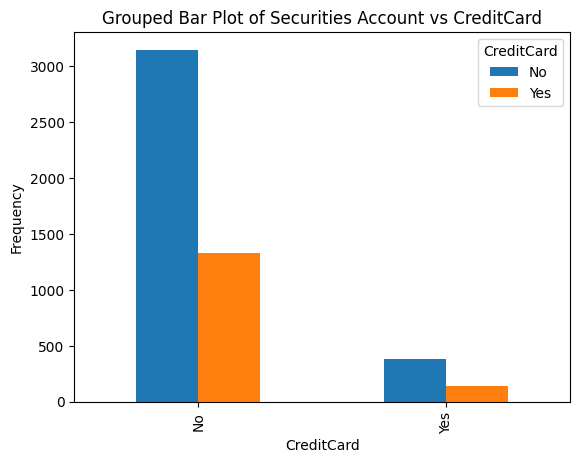

In [29]:
for cat_col in cat_columns:
    if cat_col == 'Securities.Account':
        continue
    else:
        contingency_table = pd.crosstab(data['Securities.Account'], data[cat_col])

        # Perform Chi-Square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f'Chi-Square Test for Securities Account and {cat_col}')
        print(f'Chi2: {chi2}, p-value: {p}\n')


        contingency_table.plot(kind='bar')
        plt.title(f'Grouped Bar Plot of Securities Account vs {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel('Frequency')
        plt.show()

### Stacked bar plot of CD Account with other variables

Chi-Square Test for CD Account and Education
Chi2: 1.0896096963526012, p-value: 0.5799549515634557



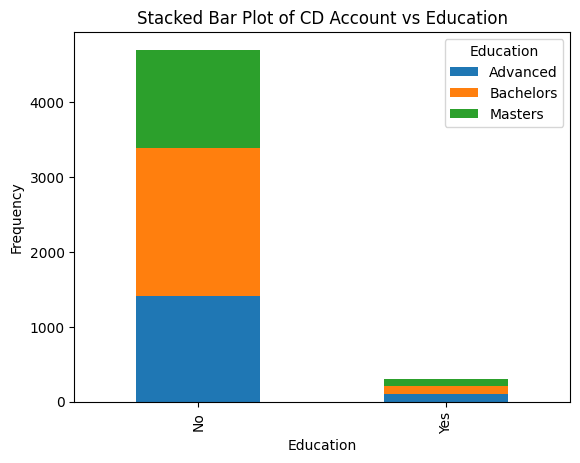

Chi-Square Test for CD Account and Securities.Account
Chi2: 498.2113233272827, p-value: 2.3289041632628143e-110



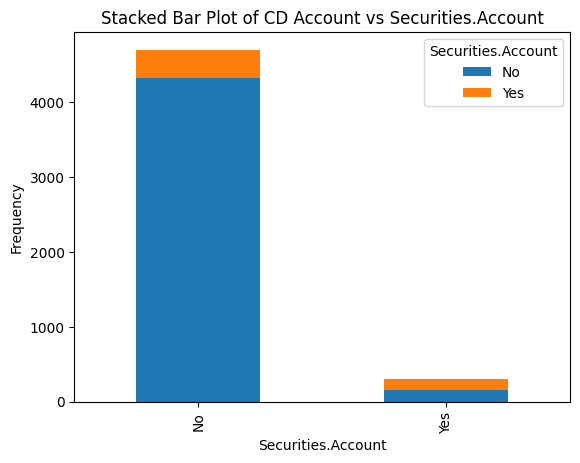

Chi-Square Test for CD Account and Online
Chi2: 153.16750824809424, p-value: 3.520986431502714e-35



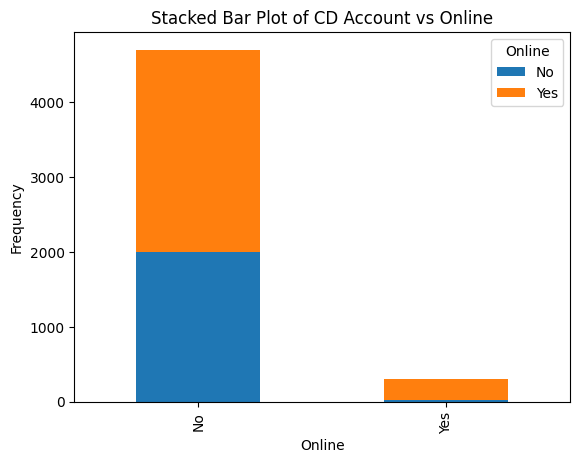

Chi-Square Test for CD Account and CreditCard
Chi2: 385.6503090218538, p-value: 7.325271343317597e-86



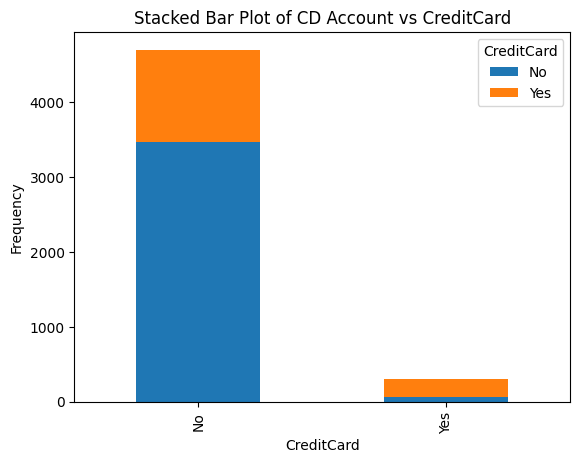

In [30]:
for cat_col in cat_columns:
    if cat_col == 'CD.Account':
        continue
    else:
        contingency_table = pd.crosstab(data['CD.Account'], data[cat_col])

        # Perform Chi-Square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f'Chi-Square Test for CD Account and {cat_col}')
        print(f'Chi2: {chi2}, p-value: {p}\n')


        contingency_table.plot(kind='bar',stacked=True)
        plt.title(f'Stacked Bar Plot of CD Account vs {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel('Frequency')
        plt.show()

###  Heatmap of Online account with other variables

Chi-Square Test for Online and Education
Chi2: 3.546454240904864, p-value: 0.1697841897500873



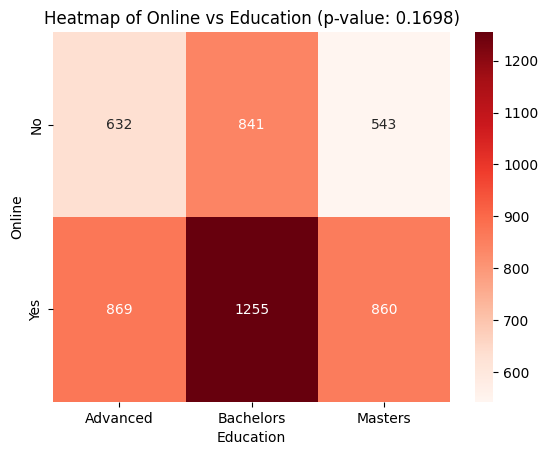

Chi-Square Test for Online and Securities.Account
Chi2: 0.7153024169236211, p-value: 0.39768913798982486



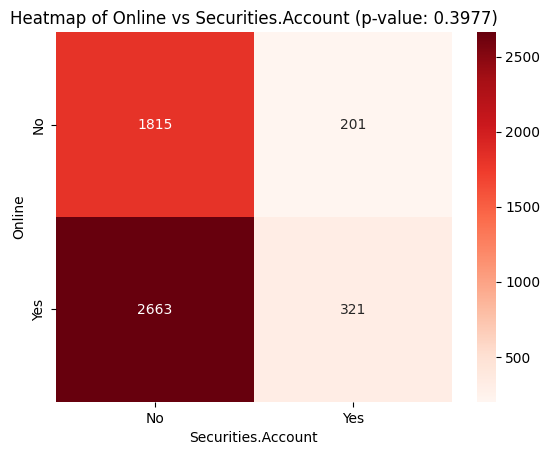

Chi-Square Test for Online and CD.Account
Chi2: 153.16750824809424, p-value: 3.520986431502714e-35



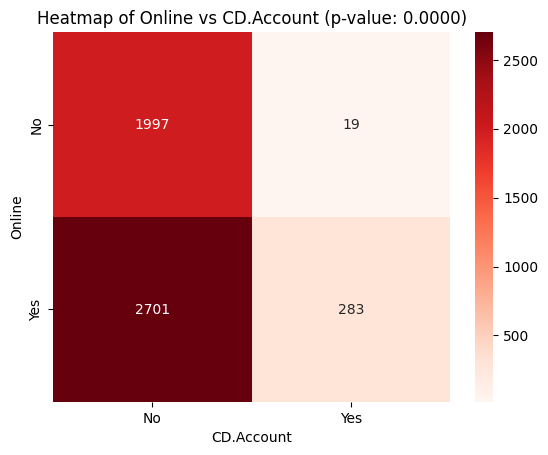

Chi-Square Test for Online and CreditCard
Chi2: 0.07077078958228833, p-value: 0.7902178000627224



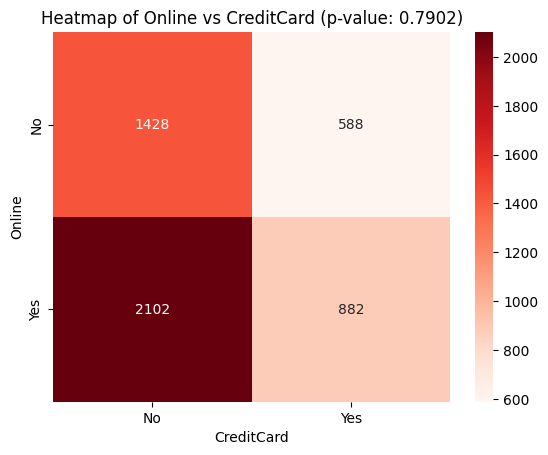

In [31]:
for cat_col in cat_columns:
    if cat_col == 'Online':
        continue
    else:
        contingency_table = pd.crosstab(data['Online'], data[cat_col])

        # Perform Chi-Square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f'Chi-Square Test for Online and {cat_col}')
        print(f'Chi2: {chi2}, p-value: {p}\n')


        sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Reds')
        plt.title(f'Heatmap of Online vs {cat_col} (p-value: {p:.4f})')
        plt.xlabel(cat_col)
        plt.ylabel('Online')
        plt.show()

In [32]:
cont_data

,Age,Experience,Income,CCAvg
0,25,1,49000,1600.0
1,45,19,34000,1500.0
2,39,15,11000,1000.0
3,35,9,100000,2700.0
4,35,8,45000,1000.0
...,...,...,...,...
4995,29,3,40000,1900.0
4996,30,4,15000,400.0
4997,63,39,24000,300.0
4998,65,40,49000,500.0


In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

cont_data = sc.fit_transform(cont_data)
cont_data = pd.DataFrame(cont_data)
cont_data

,0,1,2,3
0,-1.774417,-1.671390,-0.538229,-0.193385
1,-0.029524,-0.097873,-0.864109,-0.250611
2,-0.552992,-0.447543,-1.363793,-0.536736
3,-0.901970,-0.972049,0.569765,0.436091
4,-0.901970,-1.059467,-0.625130,-0.536736
...,...,...,...,...
4995,-1.425438,-1.496555,-0.733757,-0.021710
4996,-1.338194,-1.409137,-1.276892,-0.880087
4997,1.540880,1.650480,-1.081363,-0.937312
4998,1.715370,1.737897,-0.538229,-0.822862


In [34]:
cat_data = data.select_dtypes(include=['object'])
cat_data['Education'] = cat_data['Education'].replace({'Bachelors':1,'Masters':2,'Advanced':3})
cat_data['Securities.Account'] = cat_data['Securities.Account'].replace({'Yes':1,'No':0})
cat_data['CD.Account'] = cat_data['CD.Account'].replace({'Yes':1,'No':0})
cat_data['Online'] = cat_data['Online'].replace({'Yes':1,'No':0})
cat_data['CreditCard'] = cat_data['CreditCard'].replace({'Yes':1,'No':0})

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
cont_data = pca.fit_transform(cont_data)
cont_data = pd.DataFrame(cont_data)
cont_data

,0,1
0,2.216165,-1.136971
1,-0.119470,-0.784466
2,0.331002,-1.481985
3,1.465090,0.339340
4,1.123393,-1.156377
...,...,...
4995,1.854186,-1.056668
4996,1.475533,-1.980777
4997,-2.551582,-0.786559
4998,-2.608616,-0.289507


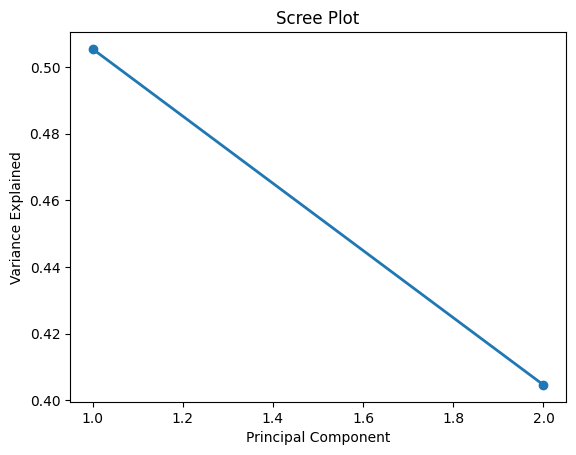

In [36]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [37]:
loadings = pca.components_
loadings_df = pd.DataFrame(loadings)
loadings_df

,0,1,2,3
0,-0.682930,-0.681953,0.185145,0.185113
1,0.182878,0.187381,0.682439,0.682438


In [78]:
np.cumsum(pca.explained_variance_ratio_)

array([0.50546424, 0.91004963])

In [79]:
x = pd.concat([cont_data,cat_data],axis=1)

In [80]:
y = data['LoanTaken']
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: LoanTaken, Length: 5000, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=20,test_size=0.2)

In [83]:
lr = LogisticRegression()

model = lr.fit(x_train,y_train)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3630
           1       0.50      0.29      0.37       370

    accuracy                           0.91      4000
   macro avg       0.72      0.63      0.66      4000
weighted avg       0.89      0.91      0.90      4000



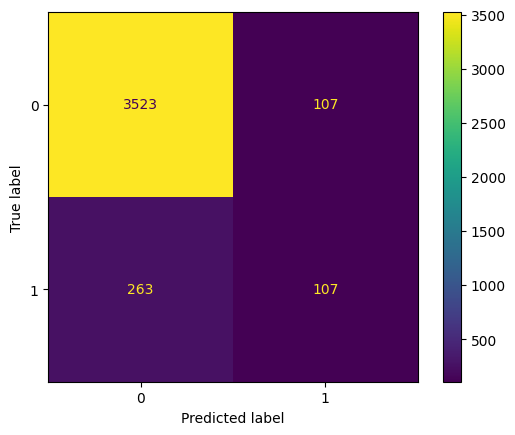

In [84]:
y_pred_tr = model.predict(x_train)
print(classification_report(y_train,y_pred_tr))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train,y_pred_tr)).plot()

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       890
           1       0.48      0.24      0.32       110

    accuracy                           0.89      1000
   macro avg       0.70      0.60      0.63      1000
weighted avg       0.86      0.89      0.87      1000



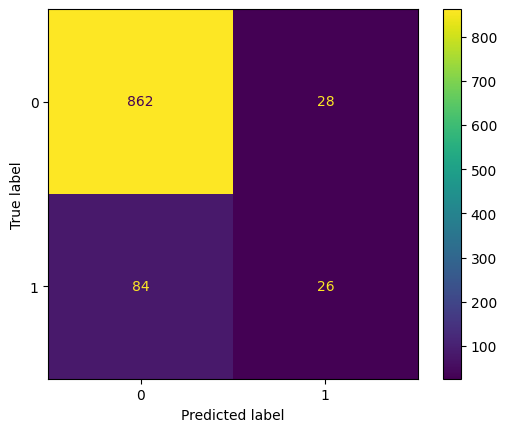

In [85]:
y_pred_te = model.predict(x_test)
print(classification_report(y_test,y_pred_te))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred_te)).plot()

In [86]:
result = model.predict_proba(x_train)
result = pd.DataFrame(result)
result

,0,1
0,0.560019,0.439981
1,0.975840,0.024160
2,0.987590,0.012410
3,0.990193,0.009807
4,0.969956,0.030044
...,...,...
3995,0.995501,0.004499
3996,0.938908,0.061092
3997,0.995100,0.004900
3998,0.665640,0.334360


In [87]:
y_train.reset_index(drop=True,inplace=True)
result['LoanTaken'] = y_train
result

,0,1,LoanTaken
0,0.560019,0.439981,1
1,0.975840,0.024160,0
2,0.987590,0.012410,0
3,0.990193,0.009807,0
4,0.969956,0.030044,0
...,...,...,...
3995,0.995501,0.004499,0
3996,0.938908,0.061092,0
3997,0.995100,0.004900,0
3998,0.665640,0.334360,0


In [88]:
def calculate_ks_statistic(df, score_column, status_column, good_value=1, bad_value=0):
    df['decile'] = pd.qcut(df[score_column], q=10)

    ks_table = df.groupby('decile').agg(
        count=(status_column, 'size'),
        bad=(status_column, lambda x: (x == bad_value).sum()),
        good=(status_column, lambda x: (x == good_value).sum())
    ).reset_index()

    ks_table = ks_table.sort_values(by=['decile'], ascending=False)

    ks_table['count %'] = (ks_table['count']/ks_table['count'].sum())*100

    ks_table['good/count'] = (ks_table['good']/ks_table['count'])*100

    ks_table['bad_cum'] = ks_table['bad'].cumsum()
    ks_table['good_cum'] = ks_table['good'].cumsum()

    total_bad = ks_table['bad'].sum()
    total_good = ks_table['good'].sum()

    ks_table['good %'] = (ks_table['good'] / total_good) * 100
    ks_table['bad %'] = (ks_table['bad'] / total_bad) * 100

    ks_table['bad_cum_perc'] = (ks_table['bad_cum'] / total_bad) * 100
    ks_table['good_cum_perc'] = (ks_table['good_cum'] / total_good) * 100

    ks_table['ks'] = np.abs(ks_table['bad_cum_perc'] - ks_table['good_cum_perc'])
    ks_stat = ks_table['ks'].max()

    return ks_stat, ks_table

In [89]:
ks_stat, ks_table = calculate_ks_statistic(result,1,'LoanTaken')
ks_table

,decile,count,bad,good,count %,good/count,bad_cum,good_cum,good %,bad %,bad_cum_perc,good_cum_perc,ks
9,"(0.33, 0.911]",400,220,180,10.0,45.00,220,180,48.648649,6.060606,6.060606,48.648649,42.588043
8,"(0.114, 0.33]",400,268,132,10.0,33.00,488,312,35.675676,7.382920,13.443526,84.324324,70.880798
7,"(0.054, 0.114]",400,355,45,10.0,11.25,843,357,12.162162,9.779614,23.223140,96.486486,73.263346
6,"(0.036, 0.054]",400,391,9,10.0,2.25,1234,366,2.432432,10.771350,33.994490,98.918919,64.924429
5,"(0.0231, 0.036]",400,396,4,10.0,1.00,1630,370,1.081081,10.909091,44.903581,100.000000,55.096419
4,"(0.0153, 0.0231]",400,400,0,10.0,0.00,2030,370,0.000000,11.019284,55.922865,100.000000,44.077135
3,"(0.0106, 0.0153]",400,400,0,10.0,0.00,2430,370,0.000000,11.019284,66.942149,100.000000,33.057851
2,"(0.00761, 0.0106]",400,400,0,10.0,0.00,2830,370,0.000000,11.019284,77.961433,100.000000,22.038567
1,"(0.00532, 0.00761]",400,400,0,10.0,0.00,3230,370,0.000000,11.019284,88.980716,100.000000,11.019284
0,"(4.9999999999999914e-05, 0.00532]",400,400,0,10.0,0.00,3630,370,0.000000,11.019284,100.000000,100.000000,0.000000


In [90]:
result = result.drop(0,axis=1)
result = result.sort_values(by=1,ascending=False)

In [91]:
gain_lift = result.groupby('decile').agg(
[
    'count',
    'sum',
]
)['LoanTaken'].sort_index(ascending=False)

In [92]:
gain_lift.columns = ['Number of customers','Number of goods']

In [93]:
gain_lift['% of customers'] = ((gain_lift['Number of customers'] / gain_lift['Number of customers'].sum())*100)
gain_lift['Cumulative goods'] = gain_lift['Number of goods'].cumsum()

In [94]:
gain_lift['Percent of Events'] = gain_lift['Number of goods']/gain_lift['Number of goods'].sum()*100

In [95]:
gain_lift['Gain'] = gain_lift['Percent of Events'].cumsum()

In [96]:
gain_lift['Lift'] = gain_lift['Gain']/np.array(range(10,100+10,10))

In [97]:
gain_lift = gain_lift.reset_index()

In [98]:
gain_lift.insert(1, 'Decile Rank', range(1, 11))
gain_lift

,decile,Decile Rank,Number of customers,Number of goods,% of customers,Cumulative goods,Percent of Events,Gain,Lift
0,"(0.33, 0.911]",1,400,180,10.0,180,48.648649,48.648649,4.864865
1,"(0.114, 0.33]",2,400,132,10.0,312,35.675676,84.324324,4.216216
2,"(0.054, 0.114]",3,400,45,10.0,357,12.162162,96.486486,3.216216
3,"(0.036, 0.054]",4,400,9,10.0,366,2.432432,98.918919,2.472973
4,"(0.0231, 0.036]",5,400,4,10.0,370,1.081081,100.000000,2.000000
5,"(0.0153, 0.0231]",6,400,0,10.0,370,0.000000,100.000000,1.666667
6,"(0.0106, 0.0153]",7,400,0,10.0,370,0.000000,100.000000,1.428571
7,"(0.00761, 0.0106]",8,400,0,10.0,370,0.000000,100.000000,1.250000
8,"(0.00532, 0.00761]",9,400,0,10.0,370,0.000000,100.000000,1.111111
9,"(4.9999999999999914e-05, 0.00532]",10,400,0,10.0,370,0.000000,100.000000,1.000000


In [99]:
random_gain = [10 * i for i in range(1, 11)]

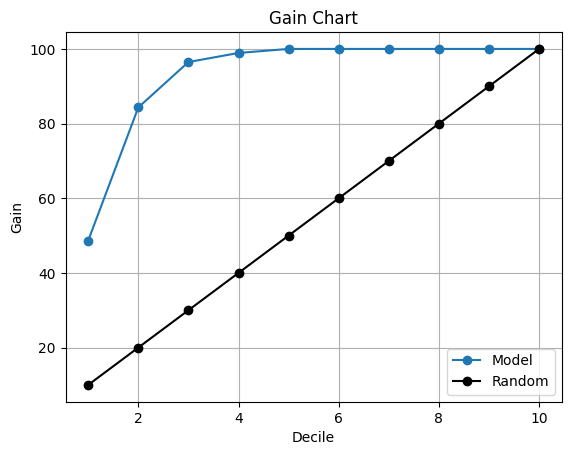

In [100]:
plt.plot([i for i in range(1,11)], gain_lift['Gain'], marker='o', linestyle='-')
plt.plot([i for i in range(1,11)], random_gain, marker='o', linestyle='-', color='black')
plt.title('Gain Chart')
plt.xlabel('Decile')
plt.ylabel('Gain')
plt.legend(['Model','Random'])
plt.grid(True)
random_lift = [1.0 for _ in range(10)]

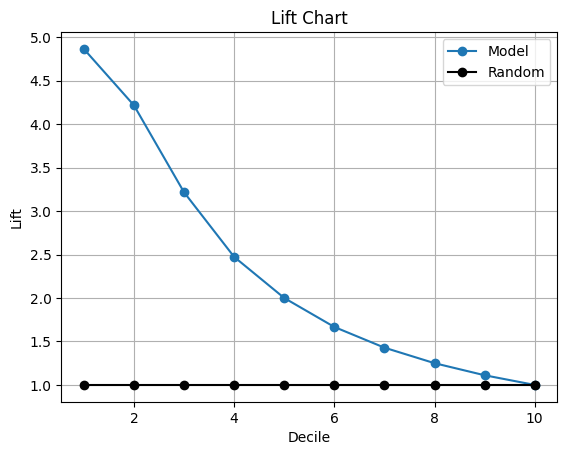

In [101]:
plt.plot([i for i in range(1,11)], gain_lift['Lift'], marker='o')
plt.plot([i for i in range(1,11)], random_lift, marker='o', color='black')
plt.title('Lift Chart')
plt.xlabel('Decile')
plt.ylabel('Lift')
plt.legend(['Model','Random'])
plt.grid(True)